In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузка и предобработка датасетов

### Загрузка и предобработка контекстных данных

Импортируем контекстные данные с диска

In [3]:
context_data = pd.read_excel('/content/drive/MyDrive/Diploma/Kont_dannyeOO.xlsx', header=0, index_col=0)
context_data

,Где расположена образовательная организация?,Наименование населенного пункта,Размер населенного пункта,ОО является специальной (коррекционной),Количество обучающихся в ОО (в сумме по всем классам)
Логин ОО,,,,,
Логин ОО,NaN,NaN,NaN,NaN,NaN
sch05153602,"4. Населенный пункт сельского типа (село, хуто...",село Шумлелик,1. Менее 1 тыс. человек,Нет,207
sch05153601,"4. Населенный пункт сельского типа (село, хуто...",Червленные-буруны,2. 1–5 тыс. человек,Да,287
sch05153598,"4. Населенный пункт сельского типа (село, хуто...",Ортатюбе,3. 5–10 тыс. чел,Нет,110
sch05153594,"4. Населенный пункт сельского типа (село, хуто...",Кумли,1. Менее 1 тыс. человек,Нет,96
...,...,...,...,...,...
sch62126033,"4. Населенный пункт сельского типа (село, хуто...",Новая Деревня,1. Менее 1 тыс. человек,Нет,32
sch63130094,"4. Населенный пункт сельского типа (село, хуто...",Кабановка,2. 1–5 тыс. человек,Нет,75
sch63133298,"4. Населенный пункт сельского типа (село, хуто...",Черновский,2. 1–5 тыс. человек,Нет,3110


Удалим первую строку

In [4]:
context_data.drop(index=context_data.index[0], axis=0, inplace=True)

Переимнуем названия колонок на что-то более короткое

In [5]:
context_data.rename(columns={
      'Где расположена образовательная организация?': 'locality_type',
      'Наименование населенного пункта': 'locality_name',
      'Размер населенного пункта': 'population',
      'ОО является специальной (коррекционной)': 'correction',
      'Количество обучающихся в ОО (в сумме по всем классам)': 'pupils_amount'
  }, inplace=True)

Поменяем название индекса

In [6]:
context_data.index.name = 'login'

In [7]:
context_data

,locality_type,locality_name,population,correction,pupils_amount
login,,,,,
sch05153602,"4. Населенный пункт сельского типа (село, хуто...",село Шумлелик,1. Менее 1 тыс. человек,Нет,207
sch05153601,"4. Населенный пункт сельского типа (село, хуто...",Червленные-буруны,2. 1–5 тыс. человек,Да,287
sch05153598,"4. Населенный пункт сельского типа (село, хуто...",Ортатюбе,3. 5–10 тыс. чел,Нет,110
sch05153594,"4. Населенный пункт сельского типа (село, хуто...",Кумли,1. Менее 1 тыс. человек,Нет,96
sch05153592,"4. Населенный пункт сельского типа (село, хуто...",Карагас,2. 1–5 тыс. человек,Нет,220
...,...,...,...,...,...
sch62126033,"4. Населенный пункт сельского типа (село, хуто...",Новая Деревня,1. Менее 1 тыс. человек,Нет,32
sch63130094,"4. Населенный пункт сельского типа (село, хуто...",Кабановка,2. 1–5 тыс. человек,Нет,75
sch63133298,"4. Населенный пункт сельского типа (село, хуто...",Черновский,2. 1–5 тыс. человек,Нет,3110


В колонке pupils_amount есть 2 записи, содержащие нецелочисленные значения, удалим их

In [8]:
context_data.drop(context_data[context_data['pupils_amount'].astype(str).str.isnumeric() == False].index, inplace=True)
context_data

,locality_type,locality_name,population,correction,pupils_amount
login,,,,,
sch05153602,"4. Населенный пункт сельского типа (село, хуто...",село Шумлелик,1. Менее 1 тыс. человек,Нет,207
sch05153601,"4. Населенный пункт сельского типа (село, хуто...",Червленные-буруны,2. 1–5 тыс. человек,Да,287
sch05153598,"4. Населенный пункт сельского типа (село, хуто...",Ортатюбе,3. 5–10 тыс. чел,Нет,110
sch05153594,"4. Населенный пункт сельского типа (село, хуто...",Кумли,1. Менее 1 тыс. человек,Нет,96
sch05153592,"4. Населенный пункт сельского типа (село, хуто...",Карагас,2. 1–5 тыс. человек,Нет,220
...,...,...,...,...,...
sch62126033,"4. Населенный пункт сельского типа (село, хуто...",Новая Деревня,1. Менее 1 тыс. человек,Нет,32
sch63130094,"4. Населенный пункт сельского типа (село, хуто...",Кабановка,2. 1–5 тыс. человек,Нет,75
sch63133298,"4. Населенный пункт сельского типа (село, хуто...",Черновский,2. 1–5 тыс. человек,Нет,3110


Видоизменим колонки locality_type и population (какие-то категории объединим, и при этом изменим у всех названия)

In [9]:
population_mapping = {
    '1. Менее 1 тыс. человек': '0-1.000',
    '2. 1–5 тыс. человек': '1.000-10.000',
    '3. 5–10 тыс. чел': '1.000-10.000',
    '4. 10–50 тыс. человек': '10.000-100.000',
    '5. 50–100 тыс. человек': '10.000-100.000',
    '6. 100–450 тыс. человек': '100.000+',
    '7. 450–680 тыс. человек': '100.000+',
    '8. Более 680 тыс. человек': '100.000+'
}

In [10]:
locality_mapping = {
    '1. Столица субъекта РФ': 'Столица субъекта РФ',
    '2. Город': 'Город',
    '3. Населенный пункт городского типа (рабочий поселок, поселок городского типа и пр.)': 'НПГТ',
    '4. Населенный пункт сельского типа (село, хутор, деревня и пр.)': 'НПСТ'
}

In [11]:
context_data['locality_type'] = context_data['locality_type'].apply(lambda x: locality_mapping[x])
context_data['population'] = context_data['population'].apply(lambda x: population_mapping[x])

В колонке про то, является ли школа коррекционной, существует 4 различных значения

In [12]:
context_data['correction'].unique()

array(['Нет', 'Да', 'нет', 'да'], dtype=object)

Следует привести всё к нижнему регистру, а затем бинарно закодировать переменные

In [13]:
context_data['correction'] = context_data['correction'].str.lower()
context_data.replace({'correction': {'да': 1, 'нет': 0}}, inplace=True)

In [14]:
context_data

,locality_type,locality_name,population,correction,pupils_amount
login,,,,,
sch05153602,НПСТ,село Шумлелик,0-1.000,0,207
sch05153601,НПСТ,Червленные-буруны,1.000-10.000,1,287
sch05153598,НПСТ,Ортатюбе,1.000-10.000,0,110
sch05153594,НПСТ,Кумли,0-1.000,0,96
sch05153592,НПСТ,Карагас,1.000-10.000,0,220
...,...,...,...,...,...
sch62126033,НПСТ,Новая Деревня,0-1.000,0,32
sch63130094,НПСТ,Кабановка,1.000-10.000,0,75
sch63133298,НПСТ,Черновский,1.000-10.000,0,3110


Добавим ещё один признак - округ, в котором находится школа (для этого сначала определим регион, в котором она находится)

In [15]:
context_data['region'] = context_data.index.str[3:5].astype(int)
context_data

,locality_type,locality_name,population,correction,pupils_amount,region
login,,,,,,
sch05153602,НПСТ,село Шумлелик,0-1.000,0,207,5
sch05153601,НПСТ,Червленные-буруны,1.000-10.000,1,287,5
sch05153598,НПСТ,Ортатюбе,1.000-10.000,0,110,5
sch05153594,НПСТ,Кумли,0-1.000,0,96,5
sch05153592,НПСТ,Карагас,1.000-10.000,0,220,5
...,...,...,...,...,...,...
sch62126033,НПСТ,Новая Деревня,0-1.000,0,32,62
sch63130094,НПСТ,Кабановка,1.000-10.000,0,75,63
sch63133298,НПСТ,Черновский,1.000-10.000,0,3110,63


Создадим таблицу с номерами и соответствующими им Федеральными округами

In [16]:
districts = pd.DataFrame({
    'district': ['ЦФО', 'СЗФО', 'ЮФО', 'СКФО', 'ПФО', 'УрФО', 'СФО', 'ДВФО', 'Севастополь', 'За пределами РФ']
}, index=np.arange(1, 11))
districts.index.name = 'district code'
districts

,district
district code,
1,ЦФО
2,СЗФО
3,ЮФО
4,СКФО
5,ПФО
6,УрФО
7,СФО
8,ДВФО
9,Севастополь


In [17]:
context_data['district'] = context_data['region'].replace({
    1: 3,  2: 5,  3: 7,  4: 7,  5: 4,  6: 4,  7: 4,  8: 3,  9: 4, 10: 2, 11: 2, 12: 5, 13: 5, 14: 8, 15: 4, 16: 5, 17: 7,
    18: 5, 19: 7, 20: 4, 21: 5, 22: 7, 23: 3, 24: 7, 25: 8, 26: 4, 27: 8, 28: 8, 29: 2, 30: 3, 31: 1, 32: 1, 33: 1, 34: 3,
    35: 2, 36: 1, 37: 1, 38: 7, 39: 2, 40: 1, 41: 8, 42: 7, 43: 5, 44: 1, 45: 6, 46: 1, 47: 2, 48: 1, 49: 8, 50: 1, 51: 2,
    52: 5, 53: 2, 54: 7, 55: 7, 56: 5, 57: 1, 58: 5, 59: 5, 60: 2, 61: 3, 62: 1, 63: 5, 64: 5, 65: 8, 66: 6, 67: 1, 68: 1,
    69: 1, 70: 7, 71: 1, 72: 6, 73: 5, 74: 6, 75: 7, 76: 1, 77: 1, 78: 2, 79: 8, 82: 3, 83: 2, 86: 6, 87: 8, 89: 6, 90: 10,
    92: 9
})
context_data

,locality_type,locality_name,population,correction,pupils_amount,region,district
login,,,,,,,
sch05153602,НПСТ,село Шумлелик,0-1.000,0,207,5,4
sch05153601,НПСТ,Червленные-буруны,1.000-10.000,1,287,5,4
sch05153598,НПСТ,Ортатюбе,1.000-10.000,0,110,5,4
sch05153594,НПСТ,Кумли,0-1.000,0,96,5,4
sch05153592,НПСТ,Карагас,1.000-10.000,0,220,5,4
...,...,...,...,...,...,...,...
sch62126033,НПСТ,Новая Деревня,0-1.000,0,32,62,1
sch63130094,НПСТ,Кабановка,1.000-10.000,0,75,63,5
sch63133298,НПСТ,Черновский,1.000-10.000,0,3110,63,5


Заменим код региона его аббревиатурой

In [18]:
context_data['district'] = context_data['district'].apply(lambda x: districts.loc[x].values[0])

Удалим признак региона

In [19]:
context_data = context_data.drop(columns='region')
context_data

,locality_type,locality_name,population,correction,pupils_amount,district
login,,,,,,
sch05153602,НПСТ,село Шумлелик,0-1.000,0,207,СКФО
sch05153601,НПСТ,Червленные-буруны,1.000-10.000,1,287,СКФО
sch05153598,НПСТ,Ортатюбе,1.000-10.000,0,110,СКФО
sch05153594,НПСТ,Кумли,0-1.000,0,96,СКФО
sch05153592,НПСТ,Карагас,1.000-10.000,0,220,СКФО
...,...,...,...,...,...,...
sch62126033,НПСТ,Новая Деревня,0-1.000,0,32,ЦФО
sch63130094,НПСТ,Кабановка,1.000-10.000,0,75,ПФО
sch63133298,НПСТ,Черновский,1.000-10.000,0,3110,ПФО


### Загрузка и предобработка результатов учеников

In [20]:
pupils = pd.read_csv(
    '/content/drive/MyDrive/Diploma/pupils_ruma456_2019_2020.csv'
)

<ipython-input-20-2c03dc24e488>:1: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  pupils = pd.read_csv(


In [21]:
pupils

,Класс,Код_предмета,ЛогинОО,Код_ученика,Балл,Отметка,Year
0,4,2,sch01110001,4001,11,4,2019
1,4,2,sch01110001,4002,18,5,2019
2,4,2,sch01110001,4003,9,3,2019
3,4,2,sch01110001,4004,11,4,2019
4,4,2,sch01110001,4005,8,3,2019
...,...,...,...,...,...,...,...
11221344,5,1,sch87176023,50212,10,2,2020
11221345,5,1,sch87176023,50213,21,3,2020
11221346,5,1,sch87176023,50214,21,3,2020
11221347,5,1,sch87176023,50216,21,3,2020


Переименуем колонки

In [22]:
pupils.rename(columns={
      'Класс': 'class',
      'Код_предмета': 'subject',
      'ЛогинОО': 'login',
      'Код_ученика': 'pupil_code',
      'Балл': 'point',
      'Отметка': 'mark',
      'Year': 'year'
  }, inplace=True)

Посмотрим на типы данных

In [23]:
pupils.dtypes

class         object
subject       object
login         object
pupil_code    object
point         object
mark          object
year           int64
dtype: object

По-хорошему, все данные за исключением логина образовательной организации, должны иметь целочисленный тип. Давайте посмотрим на уникальные значения

Немного поисследовав данные, я нашёл, что было причиной тому, что числовые данные имели строковой тип - в исходной таблице есть строки, у которых вместо значений пробелы. Удалим их

In [24]:
pupils[pupils['class'] == ' ']

,class,subject,login,pupil_code,point,mark,year
7284166,,,GUID .,,,,2020
8587100,,,GUID .,,,,2020
9891879,,,GUID .,,,,2020


In [25]:
pupils.drop(pupils[pupils['class'] == ' '].index, inplace=True)

Теперь всё пусто

In [26]:
pupils[pupils['class'] == ' ']

,class,subject,login,pupil_code,point,mark,year


Следующая проблема - некоторые значения столбцов имеют одинаковые метки разных типов. Это хорошо видно на примере столбца mark

In [27]:
pupils['mark'].value_counts()

mark
4    4075350
3    3326526
5    2038790
2    1145613
0     241854
3     144360
4     137158
2      54674
5      51899
0       5122
Name: count, dtype: int64

То есть оценки существуют сразу в двух видах - числовом и строковом

Исправим это, приведя значения всех колонок за исключеним login к числовым

In [28]:
for column_name in pupils.columns.drop('login'):
    pupils[column_name] = pupils[column_name].astype(int)

Теперь всё хорошо

In [29]:
pupils

,class,subject,login,pupil_code,point,mark,year
0,4,2,sch01110001,4001,11,4,2019
1,4,2,sch01110001,4002,18,5,2019
2,4,2,sch01110001,4003,9,3,2019
3,4,2,sch01110001,4004,11,4,2019
4,4,2,sch01110001,4005,8,3,2019
...,...,...,...,...,...,...,...
11221344,5,1,sch87176023,50212,10,2,2020
11221345,5,1,sch87176023,50213,21,3,2020
11221346,5,1,sch87176023,50214,21,3,2020
11221347,5,1,sch87176023,50216,21,3,2020


Сопоставим коду предмета его сокращённое название

In [30]:
subject_mapping = {
    1: 'rus',
    2: 'math'
}

In [31]:
pupils['subject'] = pupils['subject'].apply(lambda x: subject_mapping[x])

In [32]:
pupils

,class,subject,login,pupil_code,point,mark,year
0,4,math,sch01110001,4001,11,4,2019
1,4,math,sch01110001,4002,18,5,2019
2,4,math,sch01110001,4003,9,3,2019
3,4,math,sch01110001,4004,11,4,2019
4,4,math,sch01110001,4005,8,3,2019
...,...,...,...,...,...,...,...
11221344,5,rus,sch87176023,50212,10,2,2020
11221345,5,rus,sch87176023,50213,21,3,2020
11221346,5,rus,sch87176023,50214,21,3,2020
11221347,5,rus,sch87176023,50216,21,3,2020


## Подсчёт среднего балла для всех школ по русскому языку и математике по различным разбиениям

Соединим информацию о учениках и контекстные данные

In [33]:
joined = pupils.merge(context_data, how='left', on='login')
joined

,class,subject,login,pupil_code,point,mark,year,locality_type,locality_name,population,correction,pupils_amount,district
0,4,math,sch01110001,4001,11,4,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
1,4,math,sch01110001,4002,18,5,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
2,4,math,sch01110001,4003,9,3,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
3,4,math,sch01110001,4004,11,4,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
4,4,math,sch01110001,4005,8,3,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11221341,5,rus,sch87176023,50212,10,2,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221342,5,rus,sch87176023,50213,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221343,5,rus,sch87176023,50214,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221344,5,rus,sch87176023,50216,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО


Посмотрим на уникальные значения признака population

In [34]:
joined['population'].unique()

array(['10.000-100.000', '1.000-10.000', '0-1.000', nan, '100.000+'],
      dtype=object)

Замечаем, что присутствует NaN, попробуем вывести все строки с NaN в столбце population

In [35]:
joined[joined['population'].isna()]

,class,subject,login,pupil_code,point,mark,year,locality_type,locality_name,population,correction,pupils_amount,district
980,4,math,sch01110040,4001,16,5,2019,NaN,NaN,NaN,NaN,NaN,NaN
981,4,math,sch01110040,4002,3,2,2019,NaN,NaN,NaN,NaN,NaN,NaN
982,4,math,sch01110040,4003,10,4,2019,NaN,NaN,NaN,NaN,NaN,NaN
1000,4,math,sch01110045,4001,12,4,2019,NaN,NaN,NaN,NaN,NaN,NaN
1001,4,math,sch01110045,4002,18,5,2019,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11221068,5,rus,sch77179669,50002,26,4,2020,NaN,NaN,NaN,NaN,NaN,NaN
11221069,5,rus,sch77179669,50003,26,4,2020,NaN,NaN,NaN,NaN,NaN,NaN
11221070,5,rus,sch77179669,50004,26,4,2020,NaN,NaN,NaN,NaN,NaN,NaN
11221203,5,rus,sch02123903,50001,14,3,2020,NaN,NaN,NaN,NaN,NaN,NaN


Также NaN присутствует во признаках, присутствующих в контекстных данных. Отсюда можно сделать вывод, что информация про некоторые школы отсутствует в таблице с информацией про результаты учеников. Удалим все такие школы

In [36]:
joined.dropna(subset=['locality_type', 'locality_name', 'population', 'correction', 'pupils_amount'], inplace=True)
joined

,class,subject,login,pupil_code,point,mark,year,locality_type,locality_name,population,correction,pupils_amount,district
0,4,math,sch01110001,4001,11,4,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
1,4,math,sch01110001,4002,18,5,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
2,4,math,sch01110001,4003,9,3,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
3,4,math,sch01110001,4004,11,4,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
4,4,math,sch01110001,4005,8,3,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11221341,5,rus,sch87176023,50212,10,2,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221342,5,rus,sch87176023,50213,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221343,5,rus,sch87176023,50214,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221344,5,rus,sch87176023,50216,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО


Изменим тип признака correction на int

In [37]:
joined.loc[:, ['correction']] = joined['correction'].astype(int)
joined

,class,subject,login,pupil_code,point,mark,year,locality_type,locality_name,population,correction,pupils_amount,district
0,4,math,sch01110001,4001,11,4,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
1,4,math,sch01110001,4002,18,5,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
2,4,math,sch01110001,4003,9,3,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
3,4,math,sch01110001,4004,11,4,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
4,4,math,sch01110001,4005,8,3,2019,НПСТ,Гиагинская,10.000-100.000,0.0,611,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11221341,5,rus,sch87176023,50212,10,2,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221342,5,rus,sch87176023,50213,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221343,5,rus,sch87176023,50214,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО
11221344,5,rus,sch87176023,50216,21,3,2020,Столица субъекта РФ,Анадырь,10.000-100.000,0.0,975,ДВФО


Проверим, что не осталось пустых значений

In [38]:
joined.isna().sum()

class            0
subject          0
login            0
pupil_code       0
point            0
mark             0
year             0
locality_type    0
locality_name    0
population       0
correction       0
pupils_amount    0
district         0
dtype: int64

### Группировка по типу населённого пункта

Сгруппируем таблицу по признакам класса, предмету, году и типу населённого пункта

In [39]:
grouped_locality = joined.groupby(['class', 'subject', 'year', 'locality_type']).apply(lambda x: x['point'].mean()).reset_index().rename(columns={0: 'point'})
grouped_locality

,class,subject,year,locality_type,point
0,4,math,2019,Город,13.161256
1,4,math,2019,НПГТ,12.417105
2,4,math,2019,НПСТ,11.840573
3,4,math,2019,Столица субъекта РФ,13.757586
4,4,rus,2019,Город,27.123030
5,4,rus,2019,НПГТ,25.944107
6,4,rus,2019,НПСТ,24.859808
7,4,rus,2019,Столица субъекта РФ,27.886186
8,5,math,2019,Город,10.875846
9,5,math,2019,НПГТ,10.256974


Определеим функцию для отрисовки графиков средних баллов

In [40]:
def mean_points(dataframe, subject, subject_name, hue):
    fig, axs = plt.subplots(figsize=(15,7), ncols=2)
    sns.barplot(data=dataframe[(dataframe['subject'] == subject) & (dataframe['year'] == 2019)], x='class', y='point', hue=hue, legend=False, ax=axs[0]).set(title=subject_name + ', 2019')
    sns.barplot(data=dataframe[(dataframe['subject'] == subject) & (dataframe['year'] == 2020)], x='class', y='point', hue=hue, legend='full', ax=axs[1]).set(title=subject_name + ', 2020')
    sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1))
    plt.show()

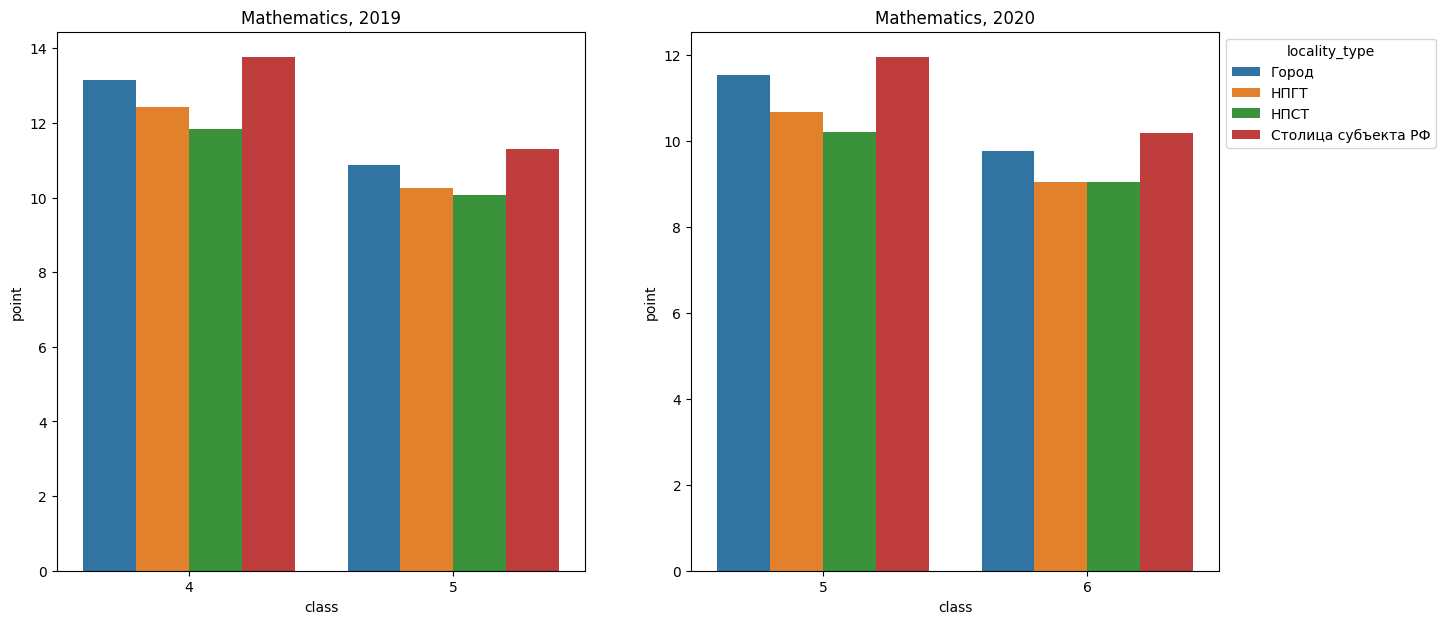

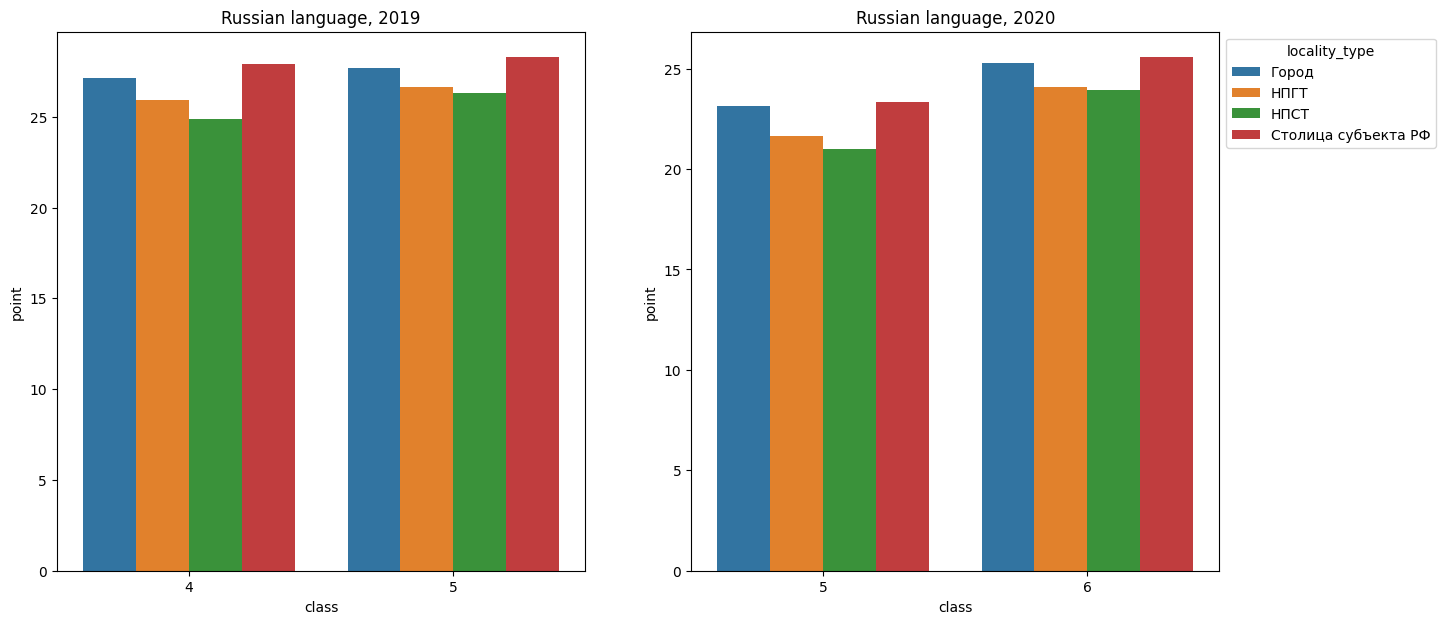

In [41]:
for subject, subject_name in zip(['math', 'rus'], ['Mathematics', 'Russian language']):
    mean_points(grouped_locality, subject, subject_name, 'locality_type')

Видим, что средний балл уменьшается с уменьшением размера населённого пункта (то есть например в столице субъекта РФ результат лучше, чем в населённом пункте сельского типа) у каждого класса по обоим предметам за каждый год

Если по русскому языку это может быть связано с тем, что в ВПР 4 классе количество баллов меньше, чем в 5 и 6 и набрать их соответственно легче, то по математике это в большей степени скорее всего объясняется возросшей сложностью работы

### Группировка по количеству населения населённого пункта

Сгруппируем таблицу по признакам класса, коду предмета, году и численности населения населённого пункта

In [42]:
grouped_population = joined.groupby(['class', 'subject', 'year', 'population']).apply(lambda x: x['point'].mean()).reset_index().rename(columns={0: 'point'})
grouped_population

,class,subject,year,population,point
0,4,math,2019,0-1.000,11.682991
1,4,math,2019,1.000-10.000,12.028094
2,4,math,2019,10.000-100.000,12.676588
3,4,math,2019,100.000+,13.473238
4,4,rus,2019,0-1.000,24.401559
5,4,rus,2019,1.000-10.000,25.239661
6,4,rus,2019,10.000-100.000,26.432782
7,4,rus,2019,100.000+,27.537298
8,5,math,2019,0-1.000,10.291671
9,5,math,2019,1.000-10.000,10.052724


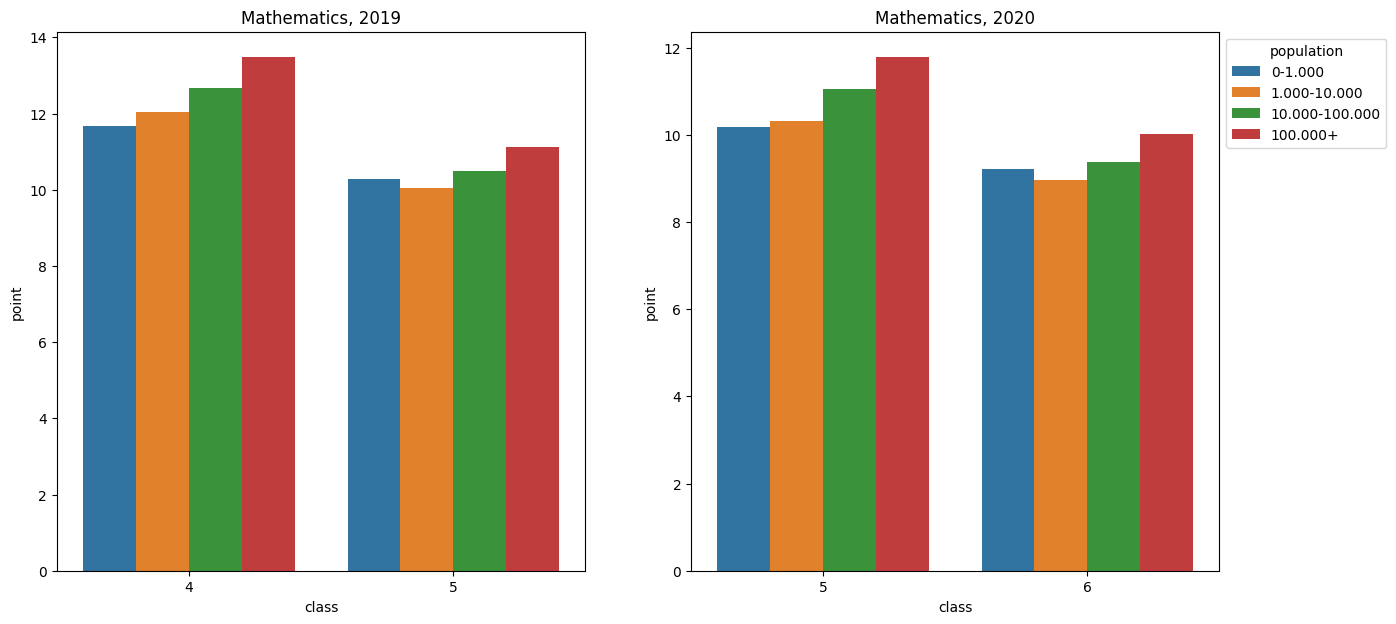

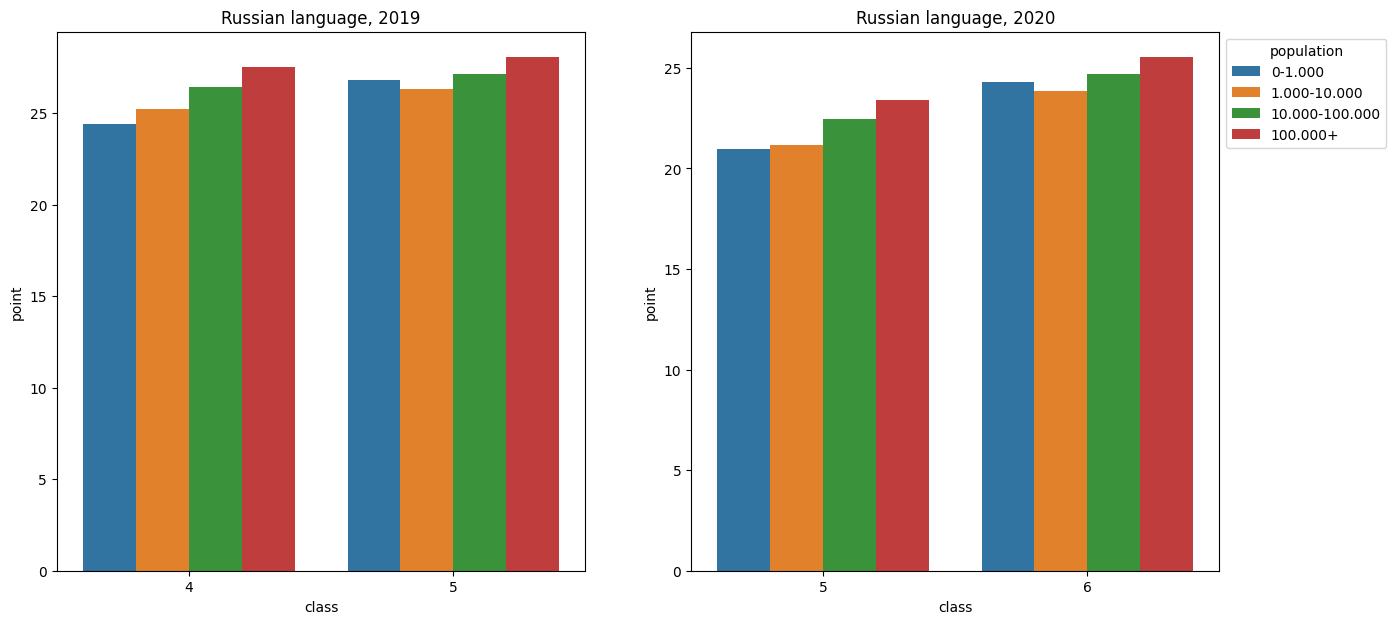

In [43]:
for subject, subject_name in zip(['math', 'rus'], ['Mathematics', 'Russian language']):
    mean_points(grouped_population, subject, subject_name, 'population')

В принципе, видим аналогичную картину той, что наблюдали в случае с группировкой по типу населённого пункта - с увеличением численности населения результаты растут (лишь в 4 случаях результаты в населённых пунктах с численностью населения меньше 1000 человек больше, чем в населённых пунктах с численностью населения от 1000 до 5000 человек)

### Группировка по типу школы

Сгруппируем таблицу по признакам класса, кода предмета, году и типу школы

In [44]:
grouped_сorrection = joined.groupby(['class', 'subject', 'year', 'correction']).apply(lambda x: x['point'].mean()).reset_index().rename(columns={0: 'point'})
grouped_сorrection

,class,subject,year,correction,point
0,4,math,2019,0.0,12.858760
1,4,math,2019,1.0,12.548623
2,4,rus,2019,0.0,26.586566
3,4,rus,2019,1.0,25.852634
4,5,math,2019,0.0,10.683522
5,5,math,2019,1.0,10.445295
6,5,math,2020,0.0,11.183988
7,5,math,2020,1.0,11.006453
8,5,rus,2019,0.0,27.355529
9,5,rus,2019,1.0,27.208699


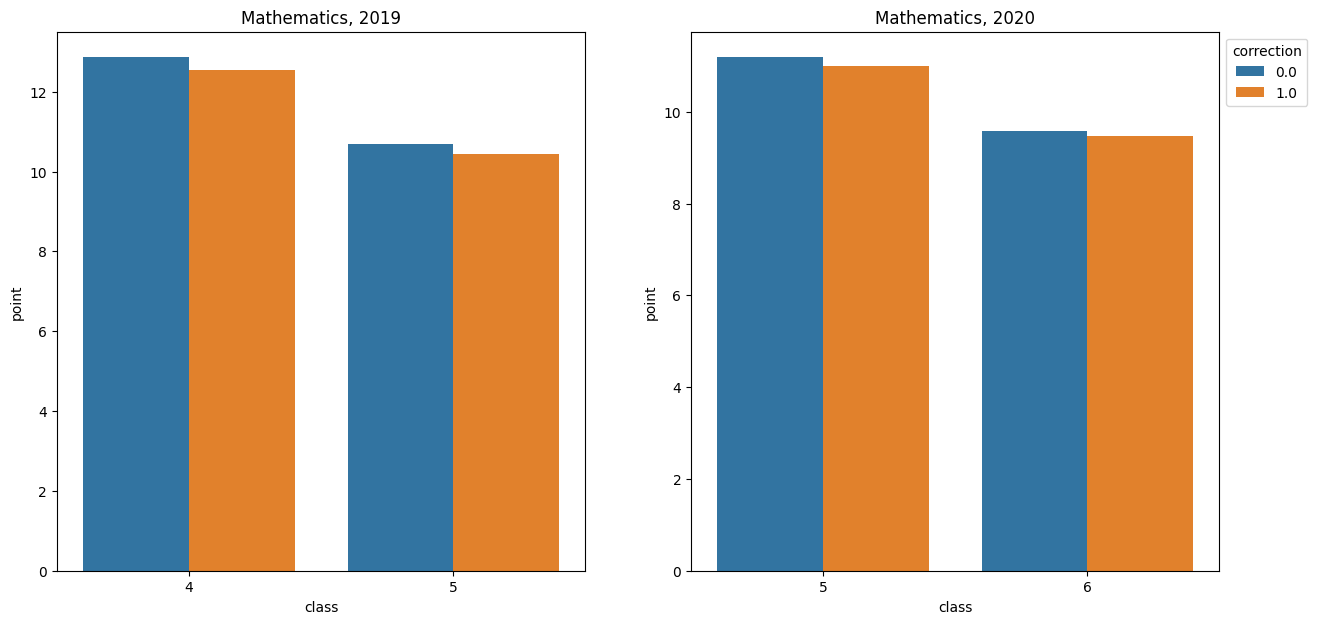

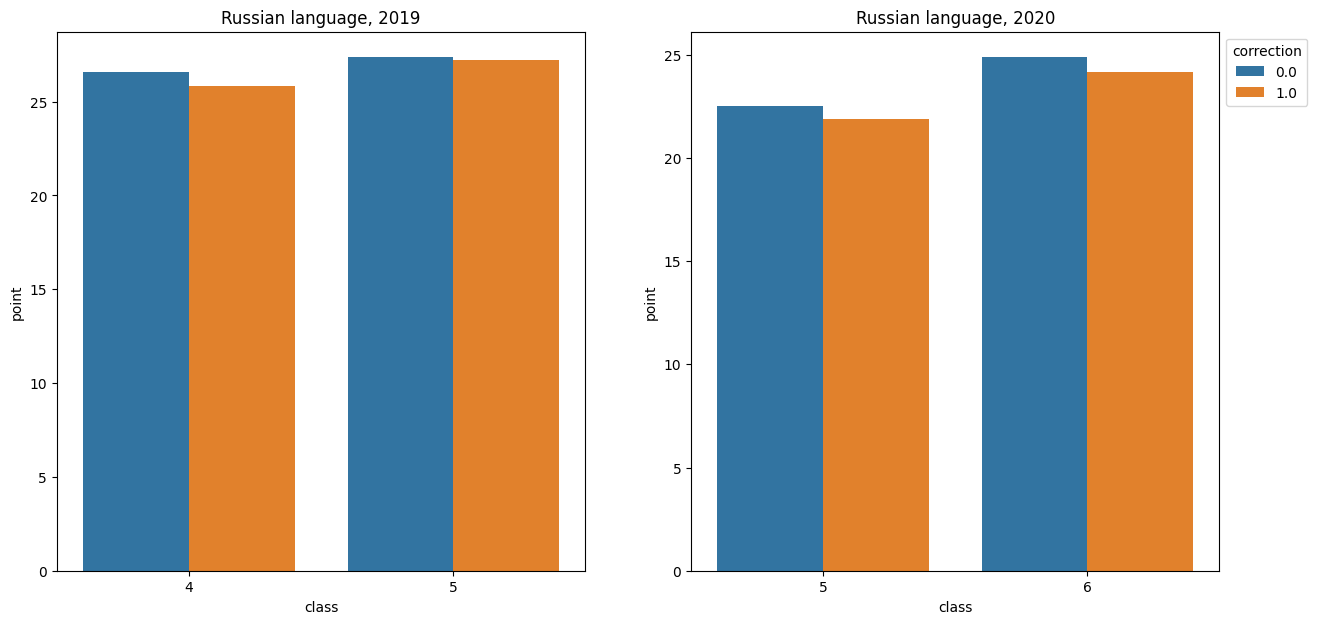

In [45]:
for subject, subject_name in zip(['math', 'rus'], ['Mathematics', 'Russian language']):
    mean_points(grouped_сorrection, subject, subject_name, 'correction')

У коррекционных школ результаты конечно ниже, чем у обычных, но на удивление разница довольно мала

### Группировка по номеру округа

Сгруппируем таблицу по признакам класса, коду предмета, году и округу

In [46]:
grouped_district = joined.groupby(['class', 'subject', 'year', 'district']).apply(lambda x: x['point'].mean()).reset_index().rename(columns={0: 'point'})
grouped_district

,class,subject,year,district,point
0,4,math,2019,ДВФО,12.601083
1,4,math,2019,За пределами РФ,14.531873
2,4,math,2019,ПФО,13.177298
3,4,math,2019,СЗФО,13.395547
4,4,math,2019,СКФО,11.777009
...,...,...,...,...,...
75,6,rus,2020,СФО,23.143267
76,6,rus,2020,Севастополь,23.493979
77,6,rus,2020,УрФО,23.837474
78,6,rus,2020,ЦФО,26.471151


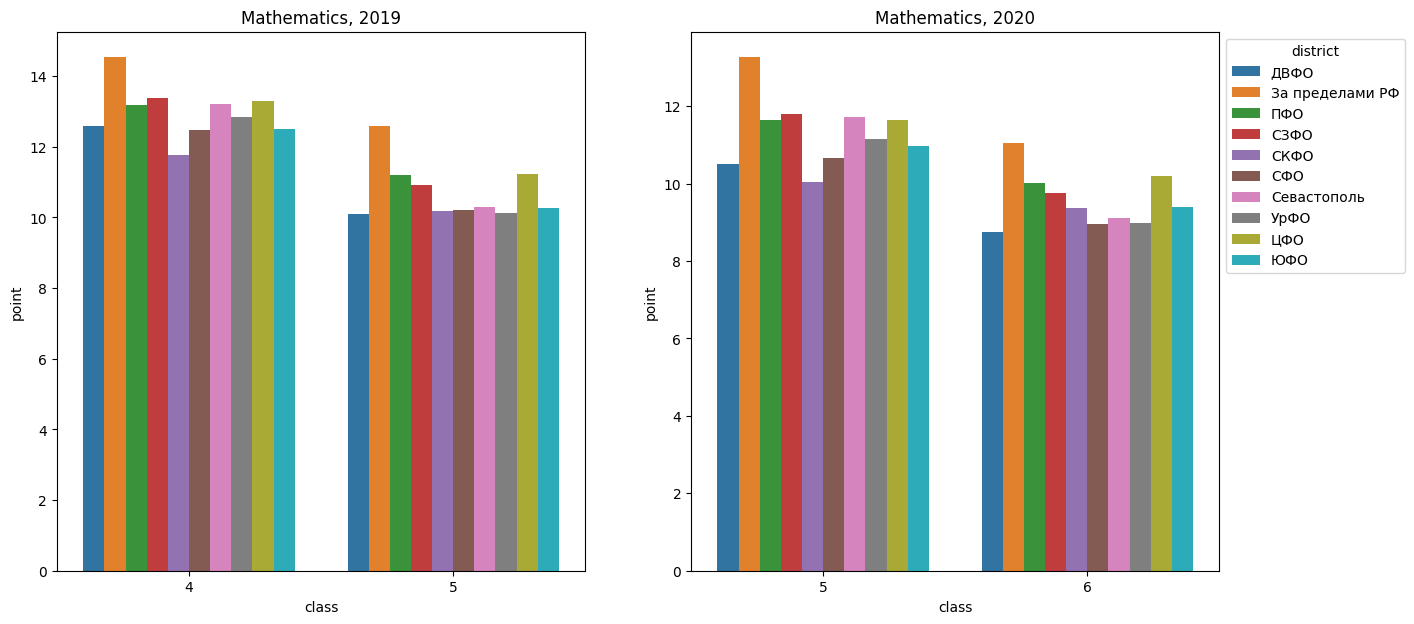

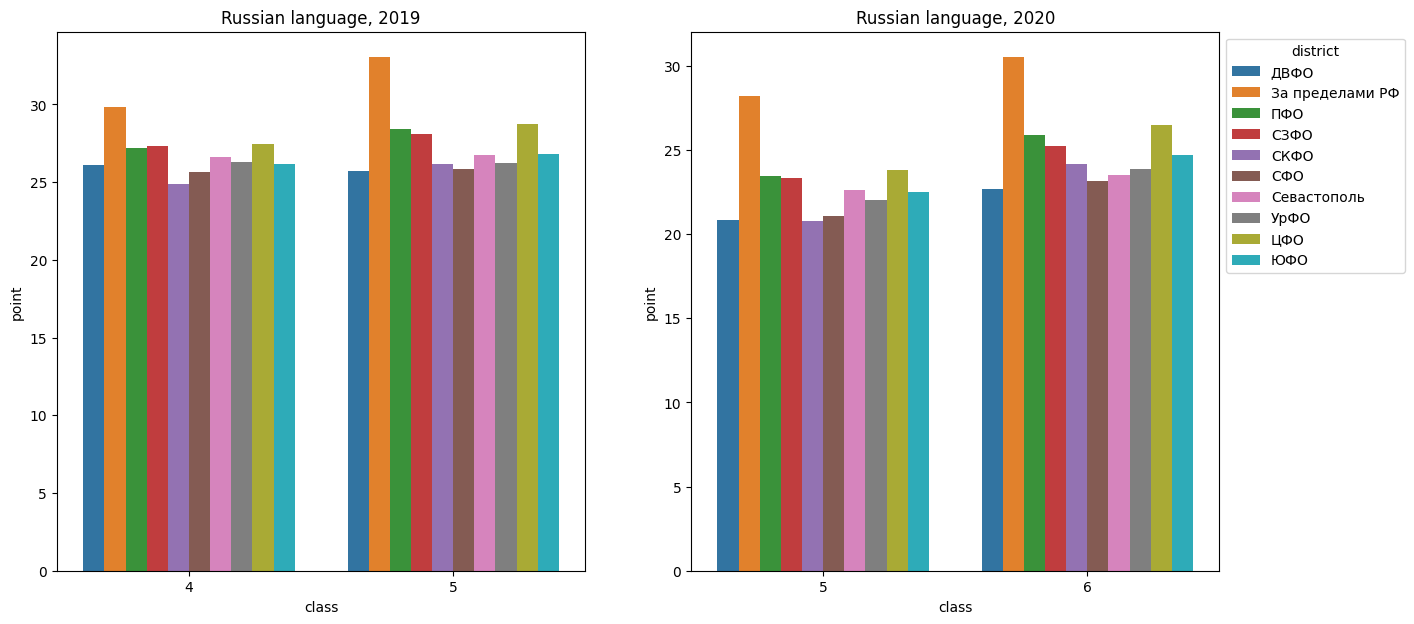

In [47]:
for subject, subject_name in zip(['math', 'rus'], ['Mathematics', 'Russian language']):
    mean_points(grouped_district, subject, subject_name, 'district')

Видим, что Южный, Северо-Кавказский, Сибирский и Дальневосточный округа обычно демонстрируют более низкую успеваемость по сравнению с другими округами. Замечаем также, что самые лучшие результаты демонстрируют ученики из русскоязычных школ, находящихся за пределами РФ - это можно объяснить тем, что как правило такие школы находятся при российских посольствах и учатся там дети людей, работающих в них. Такие дети имеют более высокий уроень образования и качество знаний

## Получение итогового датасета для дальнейшего обучения

Рассчитаем средний балл по школам для русского языка и математики по 4, 5 и 6 классам по 2019 и 2020 году отдельно

In [48]:
grouped_schools = joined.groupby(['class', 'subject', 'year', 'login']).apply(lambda x: x['point'].mean()).reset_index().rename(columns={0: 'point'})
grouped_schools

,class,subject,year,login,point
0,4,math,2019,sch01110001,11.826087
1,4,math,2019,sch01110003,13.365385
2,4,math,2019,sch01110004,12.897059
3,4,math,2019,sch01110005,9.608696
4,4,math,2019,sch01110006,12.769231
...,...,...,...,...,...
271842,6,rus,2020,sch92122008,20.960000
271843,6,rus,2020,sch92126001,27.790123
271844,6,rus,2020,sch92126007,19.763359
271845,6,rus,2020,sch92126013,24.768657


В промежуточной таблице будут средние баллы за 4 и 5 классы в 2019 году и за 5 и 6 классы в 2020 году в отдельных колонках

In [49]:
inter = pd.pivot_table(grouped_schools, values='point', columns=['year', 'class'], index=['login', 'subject']).reset_index()
inter

year         login subject       2019                  2020           
class                               4          5          5          6
0      ksh38180031    math        NaN        NaN  12.521739   9.571429
1      ksh38180031     rus        NaN        NaN  22.416667  31.650000
2      sch01110001    math  11.826087   8.905660  12.184615   8.781250
3      sch01110001     rus  26.923077  24.709091  23.147059  25.271429
4      sch01110003    math  13.365385  10.526316  10.085714   9.897959
...            ...     ...        ...        ...        ...        ...
71428  sch92126007     rus  23.380165  28.761062  22.333333  19.763359
71429  sch92126013    math        NaN        NaN  14.240602  11.474074
71430  sch92126013     rus        NaN        NaN  22.811594  24.768657
71431  spo66160020    math        NaN        NaN        NaN   9.500000
71432  spo66160020     rus        NaN        NaN        NaN  24.500000

[71433 rows x 6 columns]

Объединим таблицы grouped_mean_points_classes, inter, inter_2019 и inter_2020 по логину школ

In [50]:
inter_2019, inter_2020 = inter[2019], inter[2020]
inter_2019.columns = inter_2019.columns.get_level_values(0)
inter_2019 = inter_2019.rename(columns={
    4: '2019_4',
    5: '2019_5'
})
inter_2020.columns = inter_2020.columns.get_level_values(0)
inter_2020 = inter_2020.rename(columns={
    5: '2020_5',
    6: '2020_6'
})
grouped_mean_points_classes = pd.concat((inter[['login', 'subject']], inter_2019, inter_2020), axis=1).rename(columns={
    ('login', ''): 'login',
    ('subject', ''): 'subject'
})
grouped_mean_points_classes

,login,subject,2019_4,2019_5,2020_5,2020_6
0,ksh38180031,math,NaN,NaN,12.521739,9.571429
1,ksh38180031,rus,NaN,NaN,22.416667,31.650000
2,sch01110001,math,11.826087,8.905660,12.184615,8.781250
3,sch01110001,rus,26.923077,24.709091,23.147059,25.271429
4,sch01110003,math,13.365385,10.526316,10.085714,9.897959
...,...,...,...,...,...,...
71428,sch92126007,rus,23.380165,28.761062,22.333333,19.763359
71429,sch92126013,math,NaN,NaN,14.240602,11.474074
71430,sch92126013,rus,NaN,NaN,22.811594,24.768657
71431,spo66160020,math,NaN,NaN,NaN,9.500000


In [51]:
grouped = grouped_schools.drop(columns=['year', 'point']).drop_duplicates().merge(grouped_mean_points_classes, on=['login', 'subject'], how='left')
grouped = grouped.dropna()
grouped

,class,subject,login,2019_4,2019_5,2020_5,2020_6
0,4,math,sch01110001,11.826087,8.905660,12.184615,8.781250
1,4,math,sch01110003,13.365385,10.526316,10.085714,9.897959
2,4,math,sch01110004,12.897059,11.591837,9.268657,8.158730
3,4,math,sch01110005,9.608696,11.733333,9.714286,10.681818
4,4,math,sch01110006,12.769231,7.666667,9.533333,12.166667
...,...,...,...,...,...,...,...
206122,6,rus,sch92122004,26.384615,32.285714,20.666667,17.555556
206123,6,rus,sch92122007,30.666667,34.800000,28.750000,33.285714
206124,6,rus,sch92122008,19.500000,31.631579,23.423077,20.960000
206125,6,rus,sch92126001,28.171053,27.782051,24.440367,27.790123


Объединим таблицы grouped и контекстные данные по логину школ

In [52]:
data = grouped.join(context_data.drop(columns='locality_name'), on='login', how='left')
data

,class,subject,login,2019_4,2019_5,2020_5,2020_6,locality_type,population,correction,pupils_amount,district
0,4,math,sch01110001,11.826087,8.905660,12.184615,8.781250,НПСТ,10.000-100.000,0,611,ЮФО
1,4,math,sch01110003,13.365385,10.526316,10.085714,9.897959,НПСТ,1.000-10.000,0,419,ЮФО
2,4,math,sch01110004,12.897059,11.591837,9.268657,8.158730,НПСТ,10.000-100.000,0,612,ЮФО
3,4,math,sch01110005,9.608696,11.733333,9.714286,10.681818,НПСТ,1.000-10.000,0,153,ЮФО
4,4,math,sch01110006,12.769231,7.666667,9.533333,12.166667,НПСТ,0-1.000,0,141,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...
206122,6,rus,sch92122004,26.384615,32.285714,20.666667,17.555556,Город,100.000+,0,114,Севастополь
206123,6,rus,sch92122007,30.666667,34.800000,28.750000,33.285714,Город,100.000+,0,103,Севастополь
206124,6,rus,sch92122008,19.500000,31.631579,23.423077,20.960000,Город,100.000+,0,236,Севастополь
206125,6,rus,sch92126001,28.171053,27.782051,24.440367,27.790123,Город,100.000+,0,1085,Севастополь


Добавим к логину класс и код субъекта (таким образом будут различаться предсказания для одинаковых школ, но разных классов и кодов предмета), а также сделаем его индексом

In [53]:
data['login'] = data.apply(lambda x: x['login'] + '_' + str(x['class']) + '_' + str(x['subject']), axis=1)
data = data.set_index('login')
data

,class,subject,2019_4,2019_5,2020_5,2020_6,locality_type,population,correction,pupils_amount,district
login,,,,,,,,,,,
sch01110001_4_math,4,math,11.826087,8.905660,12.184615,8.781250,НПСТ,10.000-100.000,0,611,ЮФО
sch01110003_4_math,4,math,13.365385,10.526316,10.085714,9.897959,НПСТ,1.000-10.000,0,419,ЮФО
sch01110004_4_math,4,math,12.897059,11.591837,9.268657,8.158730,НПСТ,10.000-100.000,0,612,ЮФО
sch01110005_4_math,4,math,9.608696,11.733333,9.714286,10.681818,НПСТ,1.000-10.000,0,153,ЮФО
sch01110006_4_math,4,math,12.769231,7.666667,9.533333,12.166667,НПСТ,0-1.000,0,141,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...
sch92122004_6_rus,6,rus,26.384615,32.285714,20.666667,17.555556,Город,100.000+,0,114,Севастополь
sch92122007_6_rus,6,rus,30.666667,34.800000,28.750000,33.285714,Город,100.000+,0,103,Севастополь
sch92122008_6_rus,6,rus,19.500000,31.631579,23.423077,20.960000,Город,100.000+,0,236,Севастополь


Скачаем датасеты результатов школьников 4-6 классов по русскому языку и математике и рассчитаем их седние баллы по школам

In [54]:
def load_dataset(link):
    return pd.read_csv(link, encoding='cp1251', sep=';', index_col=0)

In [55]:
rus_4 = load_dataset('/content/drive/MyDrive/Diploma/4_1_2021_large.csv')
math_4 = load_dataset('/content/drive/MyDrive/Diploma/4_2_2021_large.csv')
rus_5 = load_dataset('/content/drive/MyDrive/Diploma/5_1_2021_large.csv')
math_5 = load_dataset('/content/drive/MyDrive/Diploma/5_2_2021_large.csv')
rus_6 = load_dataset('/content/drive/MyDrive/Diploma/6_1_2021_large.csv')
math_6 = load_dataset('/content/drive/MyDrive/Diploma/6_2_2021_large.csv')

Напишем функцию для расчёта среднего балла для каждого класса и каждого предмета

При этом вставим в логин каждой школы специальный суффикс - обозначающий номер класса и код предмета

In [56]:
def mean_point(dataset, suffix):
    result = pd.DataFrame(dataset.groupby(dataset.index).apply(lambda x: x['BAL'].mean())).rename(columns={0: 'target'})
    result.index = result.index.astype(str) + suffix
    result.index.name = 'login'
    return result

In [57]:
mean_point_rus_4 = mean_point(rus_4, '_4_rus')
mean_point_math_4 = mean_point(math_4, '_4_math')
mean_point_rus_5 = mean_point(rus_5, '_5_rus')
mean_point_math_5 = mean_point(math_5, '_5_math')
mean_point_rus_6 = mean_point(rus_6, '_6_rus')
mean_point_math_6 = mean_point(math_6, '_6_math')

In [58]:
mean_point_rus_4

,target
login,
sch01110001_4_rus,26.879310
sch01110003_4_rus,25.200000
sch01110004_4_rus,27.158730
sch01110005_4_rus,24.714286
sch01110006_4_rus,24.461538
...,...
sch35153158_4_rus,23.614286
sch35153159_4_rus,19.641026
sch35153160_4_rus,23.800000


Объединим 6 датасетов в один по логину

In [59]:
targets = pd.concat((mean_point_rus_4, mean_point_math_4, mean_point_rus_5, mean_point_math_5, mean_point_rus_6, mean_point_math_6))
targets

,target
login,
sch01110001_4_rus,26.879310
sch01110003_4_rus,25.200000
sch01110004_4_rus,27.158730
sch01110005_4_rus,24.714286
sch01110006_4_rus,24.461538
...,...
sch31110195_6_math,9.260870
sch31110197_6_math,11.766667
sch31110201_6_math,6.600000


Осталось только удалить из датасета признаков школы с теми логинами, которых нет в targets

In [60]:
preprocessed = data.merge(targets, how='right', on='login').dropna(subset={'class'})
preprocessed

,class,subject,2019_4,2019_5,2020_5,2020_6,locality_type,population,correction,pupils_amount,district,target
login,,,,,,,,,,,,
sch01110001_4_rus,4.0,rus,26.923077,24.709091,23.147059,25.271429,НПСТ,10.000-100.000,0.0,611,ЮФО,26.879310
sch01110003_4_rus,4.0,rus,25.377358,26.230769,21.457143,26.208333,НПСТ,1.000-10.000,0.0,419,ЮФО,25.200000
sch01110004_4_rus,4.0,rus,22.538462,25.659574,19.338462,23.213115,НПСТ,10.000-100.000,0.0,612,ЮФО,27.158730
sch01110005_4_rus,4.0,rus,25.222222,30.875000,21.428571,25.000000,НПСТ,1.000-10.000,0.0,153,ЮФО,24.714286
sch01110006_4_rus,4.0,rus,25.416667,27.000000,18.166667,18.615385,НПСТ,0-1.000,0.0,141,ЮФО,24.461538
...,...,...,...,...,...,...,...,...,...,...,...,...
sch31110195_6_math,6.0,math,13.693878,10.472727,11.953488,7.568182,Город,1.000-10.000,0.0,582,ЦФО,9.260870
sch31110197_6_math,6.0,math,13.300000,11.078947,12.714286,11.633333,Город,1.000-10.000,0.0,407,ЦФО,11.766667
sch31110201_6_math,6.0,math,9.916667,12.769231,11.428571,9.300000,НПСТ,1.000-10.000,0.0,106,ЦФО,6.600000


Заменим дробные числа на целые в некоторых колонках

In [61]:
preprocessed = preprocessed.astype({
    'class': 'int',
    'correction': 'int'
})
preprocessed

,class,subject,2019_4,2019_5,2020_5,2020_6,locality_type,population,correction,pupils_amount,district,target
login,,,,,,,,,,,,
sch01110001_4_rus,4,rus,26.923077,24.709091,23.147059,25.271429,НПСТ,10.000-100.000,0,611,ЮФО,26.879310
sch01110003_4_rus,4,rus,25.377358,26.230769,21.457143,26.208333,НПСТ,1.000-10.000,0,419,ЮФО,25.200000
sch01110004_4_rus,4,rus,22.538462,25.659574,19.338462,23.213115,НПСТ,10.000-100.000,0,612,ЮФО,27.158730
sch01110005_4_rus,4,rus,25.222222,30.875000,21.428571,25.000000,НПСТ,1.000-10.000,0,153,ЮФО,24.714286
sch01110006_4_rus,4,rus,25.416667,27.000000,18.166667,18.615385,НПСТ,0-1.000,0,141,ЮФО,24.461538
...,...,...,...,...,...,...,...,...,...,...,...,...
sch31110195_6_math,6,math,13.693878,10.472727,11.953488,7.568182,Город,1.000-10.000,0,582,ЦФО,9.260870
sch31110197_6_math,6,math,13.300000,11.078947,12.714286,11.633333,Город,1.000-10.000,0,407,ЦФО,11.766667
sch31110201_6_math,6,math,9.916667,12.769231,11.428571,9.300000,НПСТ,1.000-10.000,0,106,ЦФО,6.600000


In [74]:
len(set(preprocessed.index.str[:11]))

13627

По математике можно набрать максимум 20 баллов (для всех классов), а для русского языка - 38 баллов могут набрать четероклассники, а 45 - пяти- и шестиклассники

Получается, что у признаков средних баллов разные масштабы, и лучше перевести эти средние баллы в проценты выполнения

Сначала разберёмся с "математиками"

In [62]:
def normalize_points(dataset, query, columns, max_value):
    dataset.loc[query, columns] = dataset[query][columns].apply(lambda x: x / max_value)

In [63]:
normalize_points(preprocessed, preprocessed['subject'] == 'math', ['2019_4', '2019_5', '2020_5', '2020_6', 'target'], 20)

Затем идут четвероклассниками с результатами по русскому языку

In [64]:
normalize_points(preprocessed, (preprocessed['subject'] == 'rus') & (preprocessed['class'] == 4), ['2019_4', '2019_5', '2020_5', '2020_6', 'target'], 38)

А потом уже пяти- и шестиклассники с, опять-таки, результатами по русскому языку

In [65]:
normalize_points(preprocessed, (preprocessed['subject'] == 'rus') & ((preprocessed['class'] == 5) | (preprocessed['class'] == 6)), ['2019_4', '2019_5', '2020_5', '2020_6', 'target'], 45)

Вот что получилось

In [66]:
preprocessed

,class,subject,2019_4,2019_5,2020_5,2020_6,locality_type,population,correction,pupils_amount,district,target
login,,,,,,,,,,,,
sch01110001_4_rus,4,rus,0.708502,0.650239,0.609133,0.665038,НПСТ,10.000-100.000,0,611,ЮФО,0.707350
sch01110003_4_rus,4,rus,0.667825,0.690283,0.564662,0.689693,НПСТ,1.000-10.000,0,419,ЮФО,0.663158
sch01110004_4_rus,4,rus,0.593117,0.675252,0.508907,0.610871,НПСТ,10.000-100.000,0,612,ЮФО,0.714703
sch01110005_4_rus,4,rus,0.663743,0.812500,0.563910,0.657895,НПСТ,1.000-10.000,0,153,ЮФО,0.650376
sch01110006_4_rus,4,rus,0.668860,0.710526,0.478070,0.489879,НПСТ,0-1.000,0,141,ЮФО,0.643725
...,...,...,...,...,...,...,...,...,...,...,...,...
sch31110195_6_math,6,math,0.684694,0.523636,0.597674,0.378409,Город,1.000-10.000,0,582,ЦФО,0.463043
sch31110197_6_math,6,math,0.665000,0.553947,0.635714,0.581667,Город,1.000-10.000,0,407,ЦФО,0.588333
sch31110201_6_math,6,math,0.495833,0.638462,0.571429,0.465000,НПСТ,1.000-10.000,0,106,ЦФО,0.330000


Так как целью данной дипломной работы также является исследованием динамики успеваемости, поэтому нужно добавить разность процентов успеваемости какого-то класса за данный год и следующего класса за следующий год

In [67]:
preprocessed.insert(6, '4_dyn', preprocessed['2020_5'] - preprocessed['2019_4'])
preprocessed.insert(7, '5_dyn', preprocessed['2020_6'] - preprocessed['2019_5'])
preprocessed

,class,subject,2019_4,2019_5,2020_5,2020_6,4_dyn,5_dyn,locality_type,population,correction,pupils_amount,district,target
login,,,,,,,,,,,,,,
sch01110001_4_rus,4,rus,0.708502,0.650239,0.609133,0.665038,-0.099369,0.014798,НПСТ,10.000-100.000,0,611,ЮФО,0.707350
sch01110003_4_rus,4,rus,0.667825,0.690283,0.564662,0.689693,-0.103164,-0.000590,НПСТ,1.000-10.000,0,419,ЮФО,0.663158
sch01110004_4_rus,4,rus,0.593117,0.675252,0.508907,0.610871,-0.084211,-0.064381,НПСТ,10.000-100.000,0,612,ЮФО,0.714703
sch01110005_4_rus,4,rus,0.663743,0.812500,0.563910,0.657895,-0.099833,-0.154605,НПСТ,1.000-10.000,0,153,ЮФО,0.650376
sch01110006_4_rus,4,rus,0.668860,0.710526,0.478070,0.489879,-0.190789,-0.220648,НПСТ,0-1.000,0,141,ЮФО,0.643725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sch31110195_6_math,6,math,0.684694,0.523636,0.597674,0.378409,-0.087019,-0.145227,Город,1.000-10.000,0,582,ЦФО,0.463043
sch31110197_6_math,6,math,0.665000,0.553947,0.635714,0.581667,-0.029286,0.027719,Город,1.000-10.000,0,407,ЦФО,0.588333
sch31110201_6_math,6,math,0.495833,0.638462,0.571429,0.465000,0.075595,-0.173462,НПСТ,1.000-10.000,0,106,ЦФО,0.330000


Посмотрим, есть ли те ученики, которые набрали больше баллов, чем максимальное количество

In [68]:
preprocessed[preprocessed['target'] > 1]

,class,subject,2019_4,2019_5,2020_5,2020_6,4_dyn,5_dyn,locality_type,population,correction,pupils_amount,district,target
login,,,,,,,,,,,,,,
sch02123291_6_rus,6,rus,0.518519,0.513333,0.451852,0.855556,-0.066667,0.342222,НПСТ,0-1.000,0,57,ПФО,1.022222
sch04143086_6_rus,6,rus,0.788889,0.686111,0.475000,0.888889,-0.313889,0.202778,НПСТ,0-1.000,0,58,СФО,1.022222
sch05153622_6_rus,6,rus,0.714878,0.640936,0.590196,0.849573,-0.124682,0.208637,НПСТ,1.000-10.000,0,430,СКФО,1.004938
sch08183082_6_rus,6,rus,0.607407,0.733333,0.477778,0.477778,-0.129630,-0.255556,НПСТ,0-1.000,0,20,ЮФО,1.022222
sch14146097_6_rus,6,rus,0.644444,0.688889,0.711111,0.666667,0.066667,-0.022222,НПСТ,0-1.000,0,30,ДВФО,1.022222
sch16163543_6_rus,6,rus,0.451852,0.702222,0.522222,0.911111,0.070370,0.208889,НПСТ,0-1.000,0,38,ПФО,1.044444
sch16163549_6_rus,6,rus,0.733333,0.537778,0.494444,0.911111,-0.238889,0.373333,НПСТ,0-1.000,0,39,ПФО,1.011111
sch19196008_6_rus,6,rus,0.650000,0.866667,0.622222,0.844444,-0.027778,-0.022222,НПСТ,0-1.000,0,32,СФО,1.022222
sch24143530_6_rus,6,rus,0.755556,0.503704,0.529630,0.866667,-0.225926,0.362963,НПСТ,0-1.000,0,40,СФО,1.044444


Оказывается, есть. Удалим этих гениев из датасета, благо их всего 6

In [69]:
preprocessed = preprocessed.drop(preprocessed[preprocessed['target'] > 1].index)

Сохраним итоговый датасет с признаками и таргетами

In [70]:
preprocessed.to_csv('/content/drive/MyDrive/Diploma/preprocessed_large.csv')